# Predictions using supervised ML

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


## Imports

In [1]:
# importing all required libraries in this task
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# reading data from the link

newdata = pd.read_csv("http://bit.ly/w-data")
newdata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

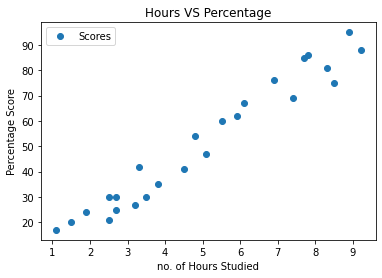

In [3]:
# plotting the distribution of scores
newdata.plot(x='Hours', y='Scores', style='o')  

plt.title('Hours VS Percentage')  
plt.xlabel('no. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Initialisation

In [4]:
# divide the data into inputs and outputs
X = newdata.iloc[:, :-1].values  
Y = newdata.iloc[:, 1].values 

Now that we have our attributes (inputs) and labels (outputs), the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
# split inputs and outputs into training and tests
from sklearn.model_selection import train_test_split  

X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Training the algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
# training the algorithm
from sklearn.linear_model import LinearRegression  

#create a linear regression object using constructor
lm = LinearRegression()  

#now fit the model
lm.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


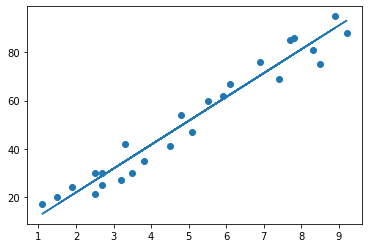

In [7]:
# Plotting the regression line
line = lm.coef_ * X + lm.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()


## Making predictions 

Now that we have trained our algorithm, it's time to make some predictions.

In [8]:
# making predictions

# Testing data - In Hours
print(X_test)

# Predicting the scores
Y_pred = lm.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Now we can test this with our own data
### If a student studies for 9.25 hours a day then his score is..

In [10]:
hours = float(input("Enter the no. of hours: "))

Enter the no. of hours: 9.25


In [11]:
hours

new_pred = lm.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred))

No of Hours = 9.25
Predicted Score = [93.69173249]


# Evaluating the model

In [12]:
# calculating mean absolute error

from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


In [13]:
# calculating mean squared error

from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

21.5987693072174

### This is how we predicted the score of a student who studies for 9.25 hours a day

### Thank you!!